In [10]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Decision trees

<div style="display:flex;gap:4rem;">
<div>

A decision tree is a supervised machine learning model that is used for both classification and regression tasks.
It represents decisions and their possible consequences in a tree-like structure, making the decision process transparent.
These trees help to identify which features are most important for predicting an outcome.

They are widely used to reveal hidden patterns and support decision-making. More explanations and use cases as an examples can be found at: https://scikit-learn.org/stable/modules/tree.html

</div>
<div style="width:50%">

![decision tree](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

</div>
</div>

In [11]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

# set the default figure size for plots
plt.rcParams['figure.figsize'] = 15, 10

## 01 Weather dataset (typical example of decision tree usage)

In this section we use a weather dataset to train a decision tree classifier.

> The goal: is to predict whether to 'play' based on weather conditions.

In [12]:
# load the dataset from csv file

# data = pd.read_csv('data/tenis.csv')
data = pd.read_csv('data/weather.csv')
data

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [13]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier(
    # specifies that the algorithm should use entropy (information gain) to measure the quality of a split.
    # entropy is a measure of the randomness or impurity in the dataset.
    # the goal is to reduce entropy with each split, making the data more homogeneous.
    criterion='entropy'
)

# select a subset of the data as features (explanatory variables) and the target variable ('play')
# here we take the first 14 rows to simulate training data
X = data.loc[data.index < 14, ['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = data.loc[data.index < 14, 'Play']

# try to fit the decision tree; this may (and will) fail if the data is not in the correct numerical format
# try:
cls.fit(X, y)
# except ValueError as e:
#     print(f"An error occurred: {e}")

An error occurred: could not convert string to float: 'Sunny'


The previous code shows that scikit-learn requires numerical data.
So we need to convert categorical variables into numerical ones.

### Encoding of categorical variables

In [14]:
# one-hot encoding: convert categorical variables into a binary matrix
# this encoding is applied to all columns (`data.columns`) except the target column ('play')
encoded = pd.concat([pd.get_dummies(data[column], prefix=column) for column in set(data.columns) - {'Play'}], axis=1)
encoded

,Humidity_High,Humidity_Normal,Temperature_Cool,Temperature_Hot,Temperature_Mild,Wind_Strong,Wind_Weak,Outlook_Overcast,Outlook_Rain,Outlook_Sunny
0,True,False,False,True,False,False,True,False,False,True
1,True,False,False,True,False,True,False,False,False,True
2,True,False,False,True,False,False,True,True,False,False
3,True,False,False,False,True,False,True,False,True,False
4,False,True,True,False,False,False,True,False,True,False
5,False,True,True,False,False,True,False,False,True,False
6,False,True,True,False,False,True,False,True,False,False
7,True,False,False,False,True,False,True,False,False,True
8,False,True,True,False,False,False,True,False,False,True
9,False,True,False,False,True,False,True,False,True,False


>! `get_dummies` is not a good encoding method!
> We can try other, better encoding methods: https://github.com/FIIT-IAU/IAU-course/blob/main/exercises/week-06/IAU_061_outlier_missing_transform.ipynb

### Training the classifier on the training data

In [15]:
# define training data using the encoded features and original target values
X = encoded[encoded.index < 14]
y = data.loc[data.index < 14, 'Play']

cls.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [16]:
# define the test data (the last row) and predict the target
test = encoded[encoded.index == 14]
cls.predict(test)

array(['Yes'], dtype=object)

### Visualization of the trained tree (classifier)

Visualization helps to understand the structure and decision rules learned by the model.

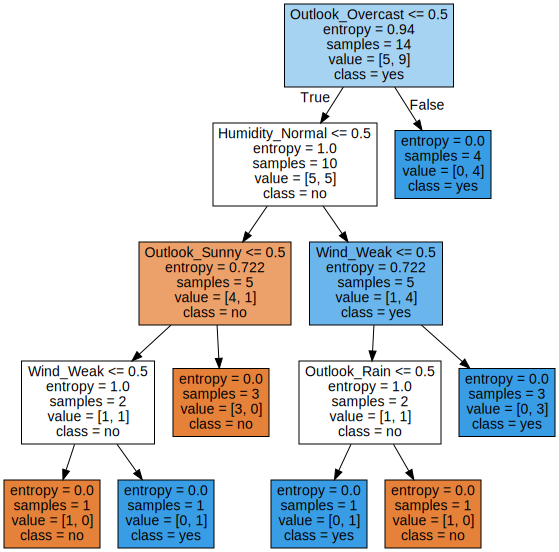

In [21]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

# export the trained decision tree to graphviz format and render it as an svg image
graph = Source(export_graphviz(cls,
                               out_file=None,
                               feature_names=encoded.columns,
                               class_names=['no', 'yes'],
                               filled=True))

display(SVG(graph.pipe(format='svg')))

# adjust the svg style so that the image fits the screen properly
from IPython.display import HTML

style = "<style>svg{width:100% !important;height:70% !important;}</style>"
HTML(style)

[Text(0.6666666666666666, 0.9, 'x[7] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.5555555555555556, 0.7, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.6111111111111112, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'x[9] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[6] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[6] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[8] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888

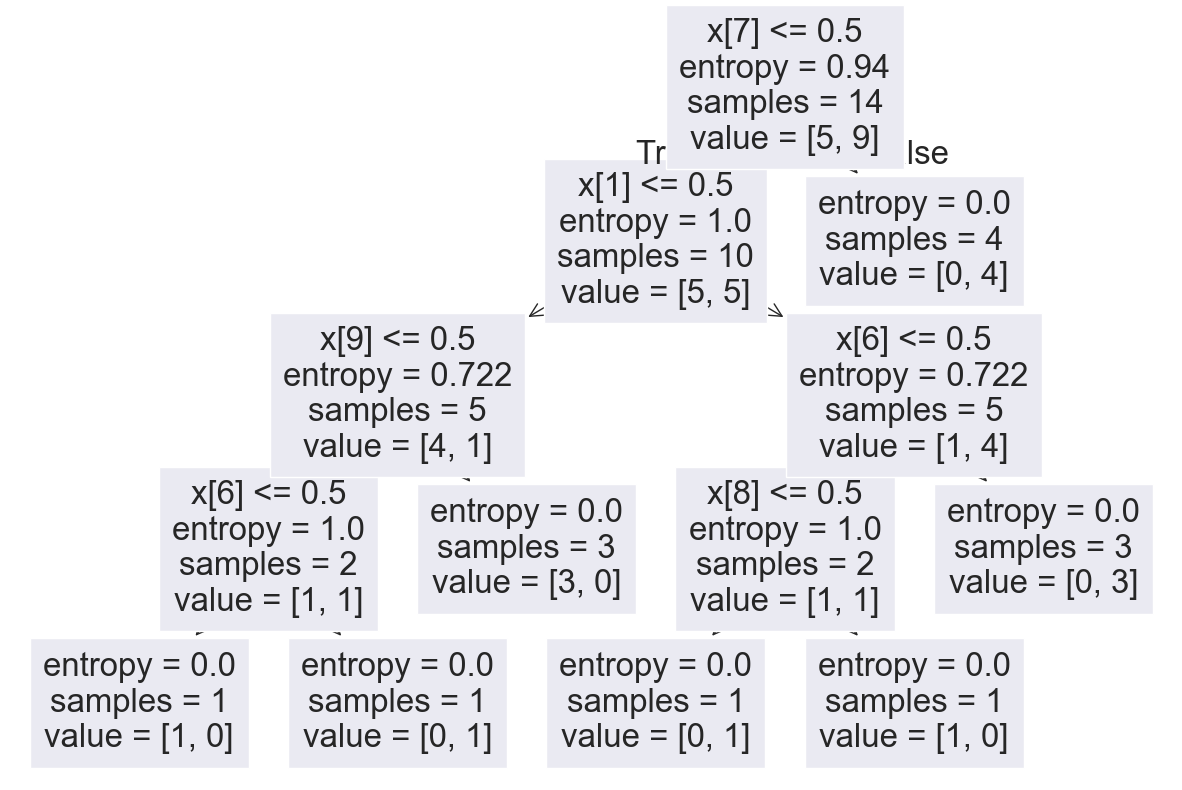

In [22]:
# plot the decision tree using matplotlib for an alternative visualization
tree.plot_tree(cls)

## 02 Breast cancer dataset (Overfitting example)

This section uses a breast cancer dataset to demonstrate overfitting in decision trees.

Overfitting occurs when a model learns both the underlying patterns and the noise in the training data,
resulting in high variance and poor generalization to unseen data. This issue can cause the model to perform
excellently on the training set while failing to predict accurately on new samples. For more details, see:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [23]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']

feature_names = data['feature_names']
features = data['data']

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# split the dataset into training and testing subsets
# random_state controls the shuffling applied to the data before applying the split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=4)

print('train data size: ', len(X_train))
print('test data size: ', len(X_test))

# train data:  455
# test data:  114


### Training the classifier on the training data with different complexities

Here we iterate over different maximum depths to create decision trees of varying complexity.
By limiting the maximum depth, we can simulate models with different levels of detail.
As model complexity increases, the training error might decrease, but the test error could increase,indicating overfitting.
This demonstrates the trade-off between bias and variance.

In [25]:
results = []
estimators = []

# loop over different maximum depths from 1 to the number of attributes in the training set
for i in range(1, X_train.shape[1] + 1):
    row = {'model_complexity': i}

    # create a decision tree with a maximum depth of i to simulate different complexities
    clf = DecisionTreeClassifier(max_depth=i)

    # train the model on the training set and predict on the same set
    pred = clf.fit(X_train, y_train).predict(X_train)

    # compute training set error (1 - accuracy)
    row['train'] = 1 - accuracy_score(y_train, pred)

    # predict on the test set and compute test error
    pred = clf.predict(X_test)

    # error on test suite
    row['test'] = 1 - accuracy_score(y_test, pred)
    results.append(row)
    estimators.append(clf)

In [26]:
# create a dataframe to display model complexity and corresponding errors
complexity_df = pd.DataFrame(results)
complexity_df.head()

,model_complexity,train,test
0,1,0.065934,0.140351
1,2,0.052747,0.131579
2,3,0.021978,0.122807
3,4,0.017582,0.105263
4,5,0.008791,0.087719


<Axes: xlabel='model_complexity'>

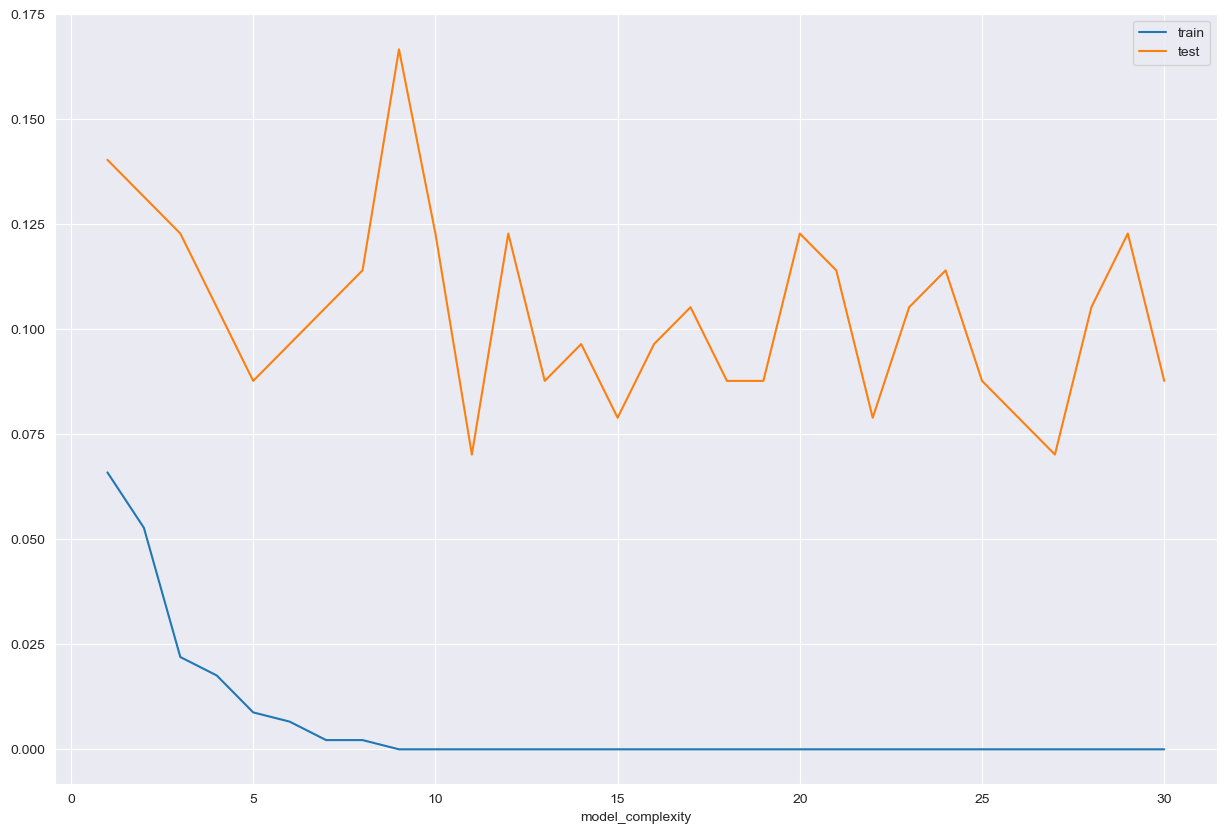

In [27]:
# plot model complexity against errors to visualize overfitting
complexity_df.plot(x='model_complexity')

As the complexity increases, the error on the training set decreases to zero, but the test set error may increase.
This indicates that the model has overfitted the training data, learning noise instead of underlying patterns.
In intelligent data analysis, this is crucial for selecting a model that generalizes well to new data.

>Data generalization is desired because it helps simplify complex data sets by summarizing detailed information into broader categories, making it easier to analyze trends and insights while also protecting individual privacy.


### Visualization of different trained models

Visualizing decision trees with different complexities to compare how they make decisions (a very simple tree (using one attribute) versus a more complex one).
This helps in understanding the balance between model simplicity and complexity in intelligent data analysis.

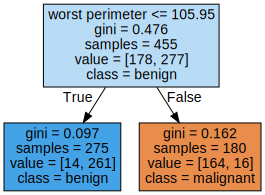

In [28]:
# only one attribute used for decision
graph = Source(export_graphviz(estimators[0],
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled=True))

display(SVG(graph.pipe(format='svg')))

# this is just to make the image fit on my screen
from IPython.display import HTML

style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

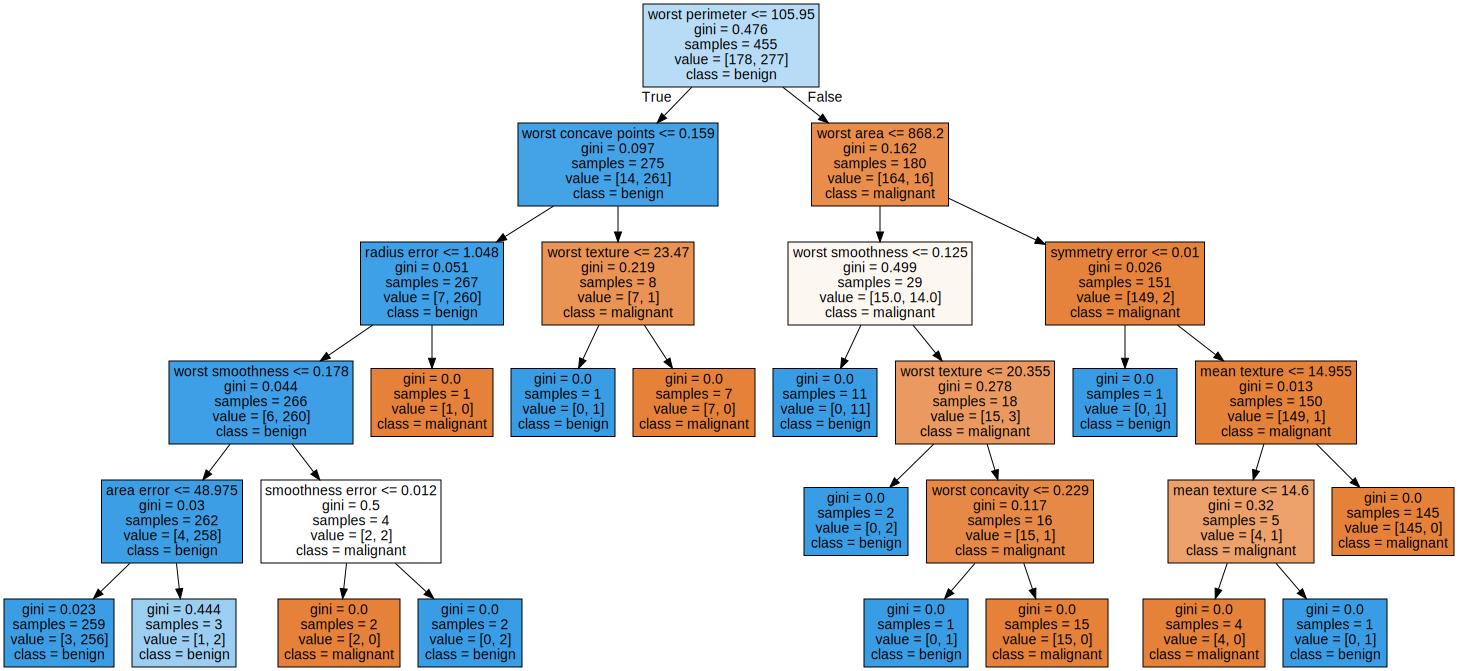

In [32]:
# model for which the error on the validation set started to increase
graph = Source(export_graphviz(estimators[4],
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled=True))

display(SVG(graph.pipe(format='svg')))

# this is just to make the image fit on my screen
from IPython.display import HTML

style = "<style>svg{width:0% !important;height:50% !important;}</style>"
HTML(style)

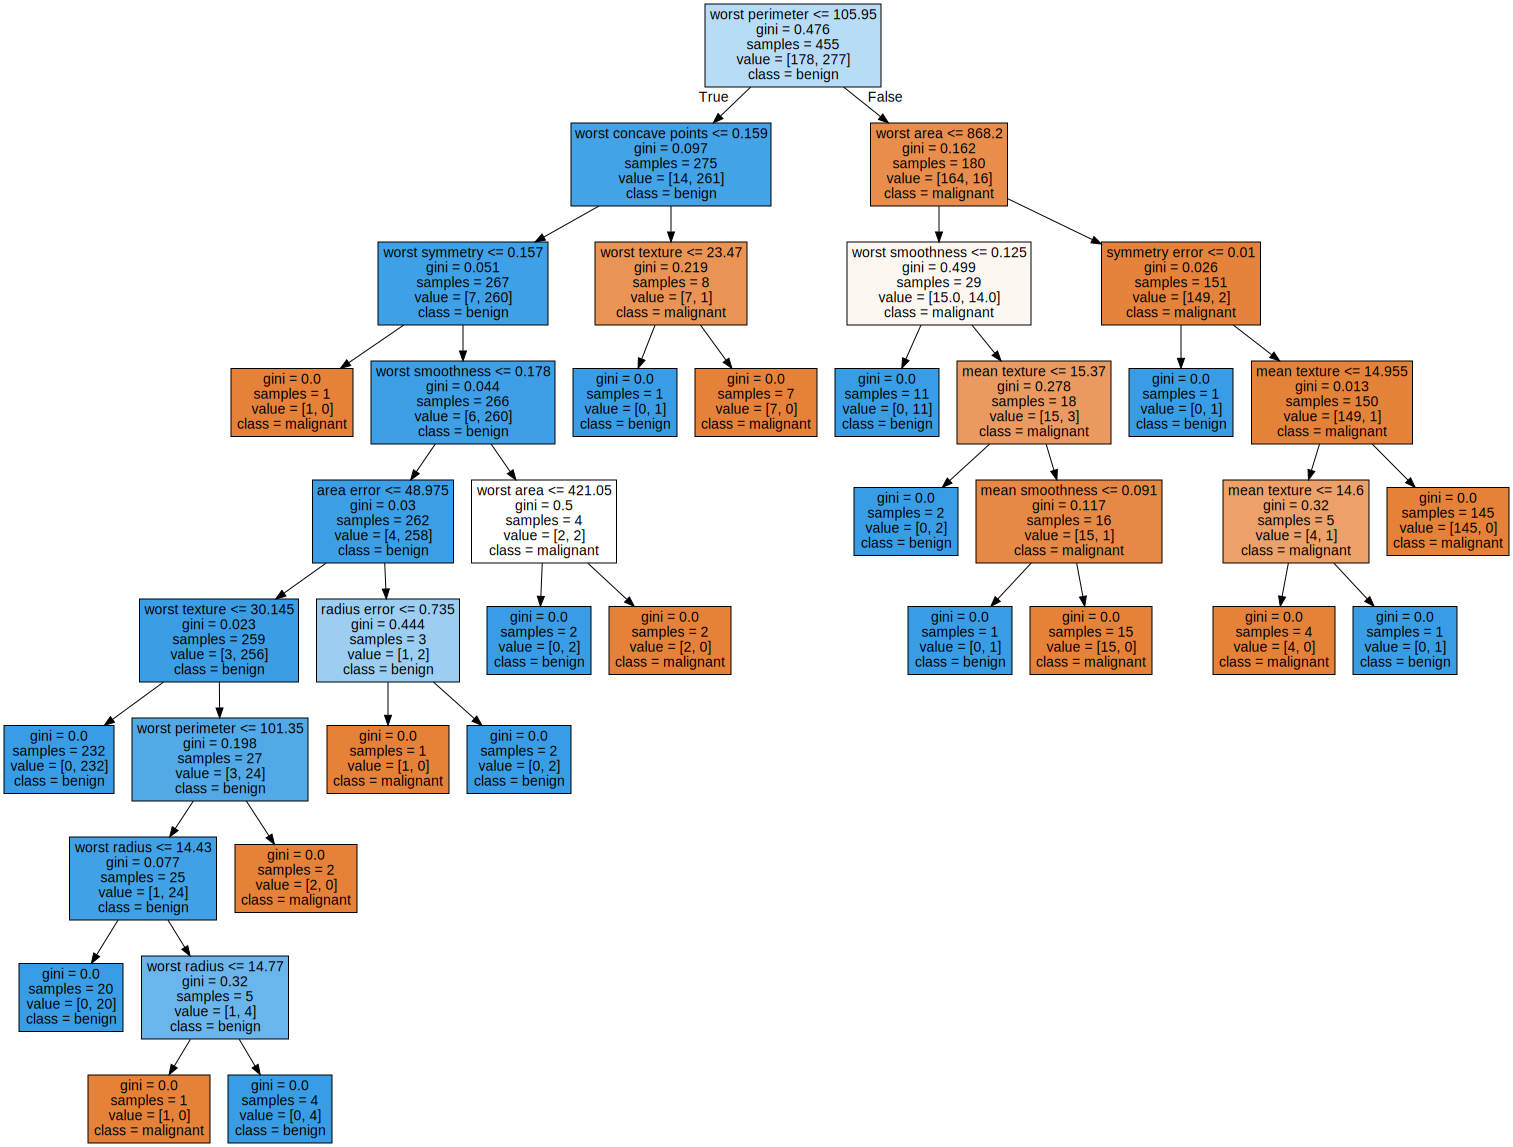

In [30]:
graph = Source(export_graphviz(estimators[-1],  # najzlozitejsi model
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled=True))

display(SVG(graph.pipe(format='svg')))

# this is just to make the image fit on my screen
from IPython.display import HTML

style = "<style>svg{width:45% !important;height:45% !important;}</style>"
HTML(style)